<a href="https://colab.research.google.com/github/Gopi-Vamsi-Penaganti/Used_Car_Price_Prediction/blob/main/Price_of_second_hand_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir /content/data
!unzip /content/archive.zip -d /content/data

Archive:  /content/archive.zip
  inflating: /content/data/train.csv  


In [ ]:
path = '/content/data/train.csv'

In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow.keras.layers  import Normalization,Dense
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

**Data Preparation**

In [ ]:
data= pd.read_csv(path,',')
print(data.shape)
data.head() 

(1000, 12)


<ipython-input-15-bc66c1ac2581>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data= pd.read_csv(path,',')


v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

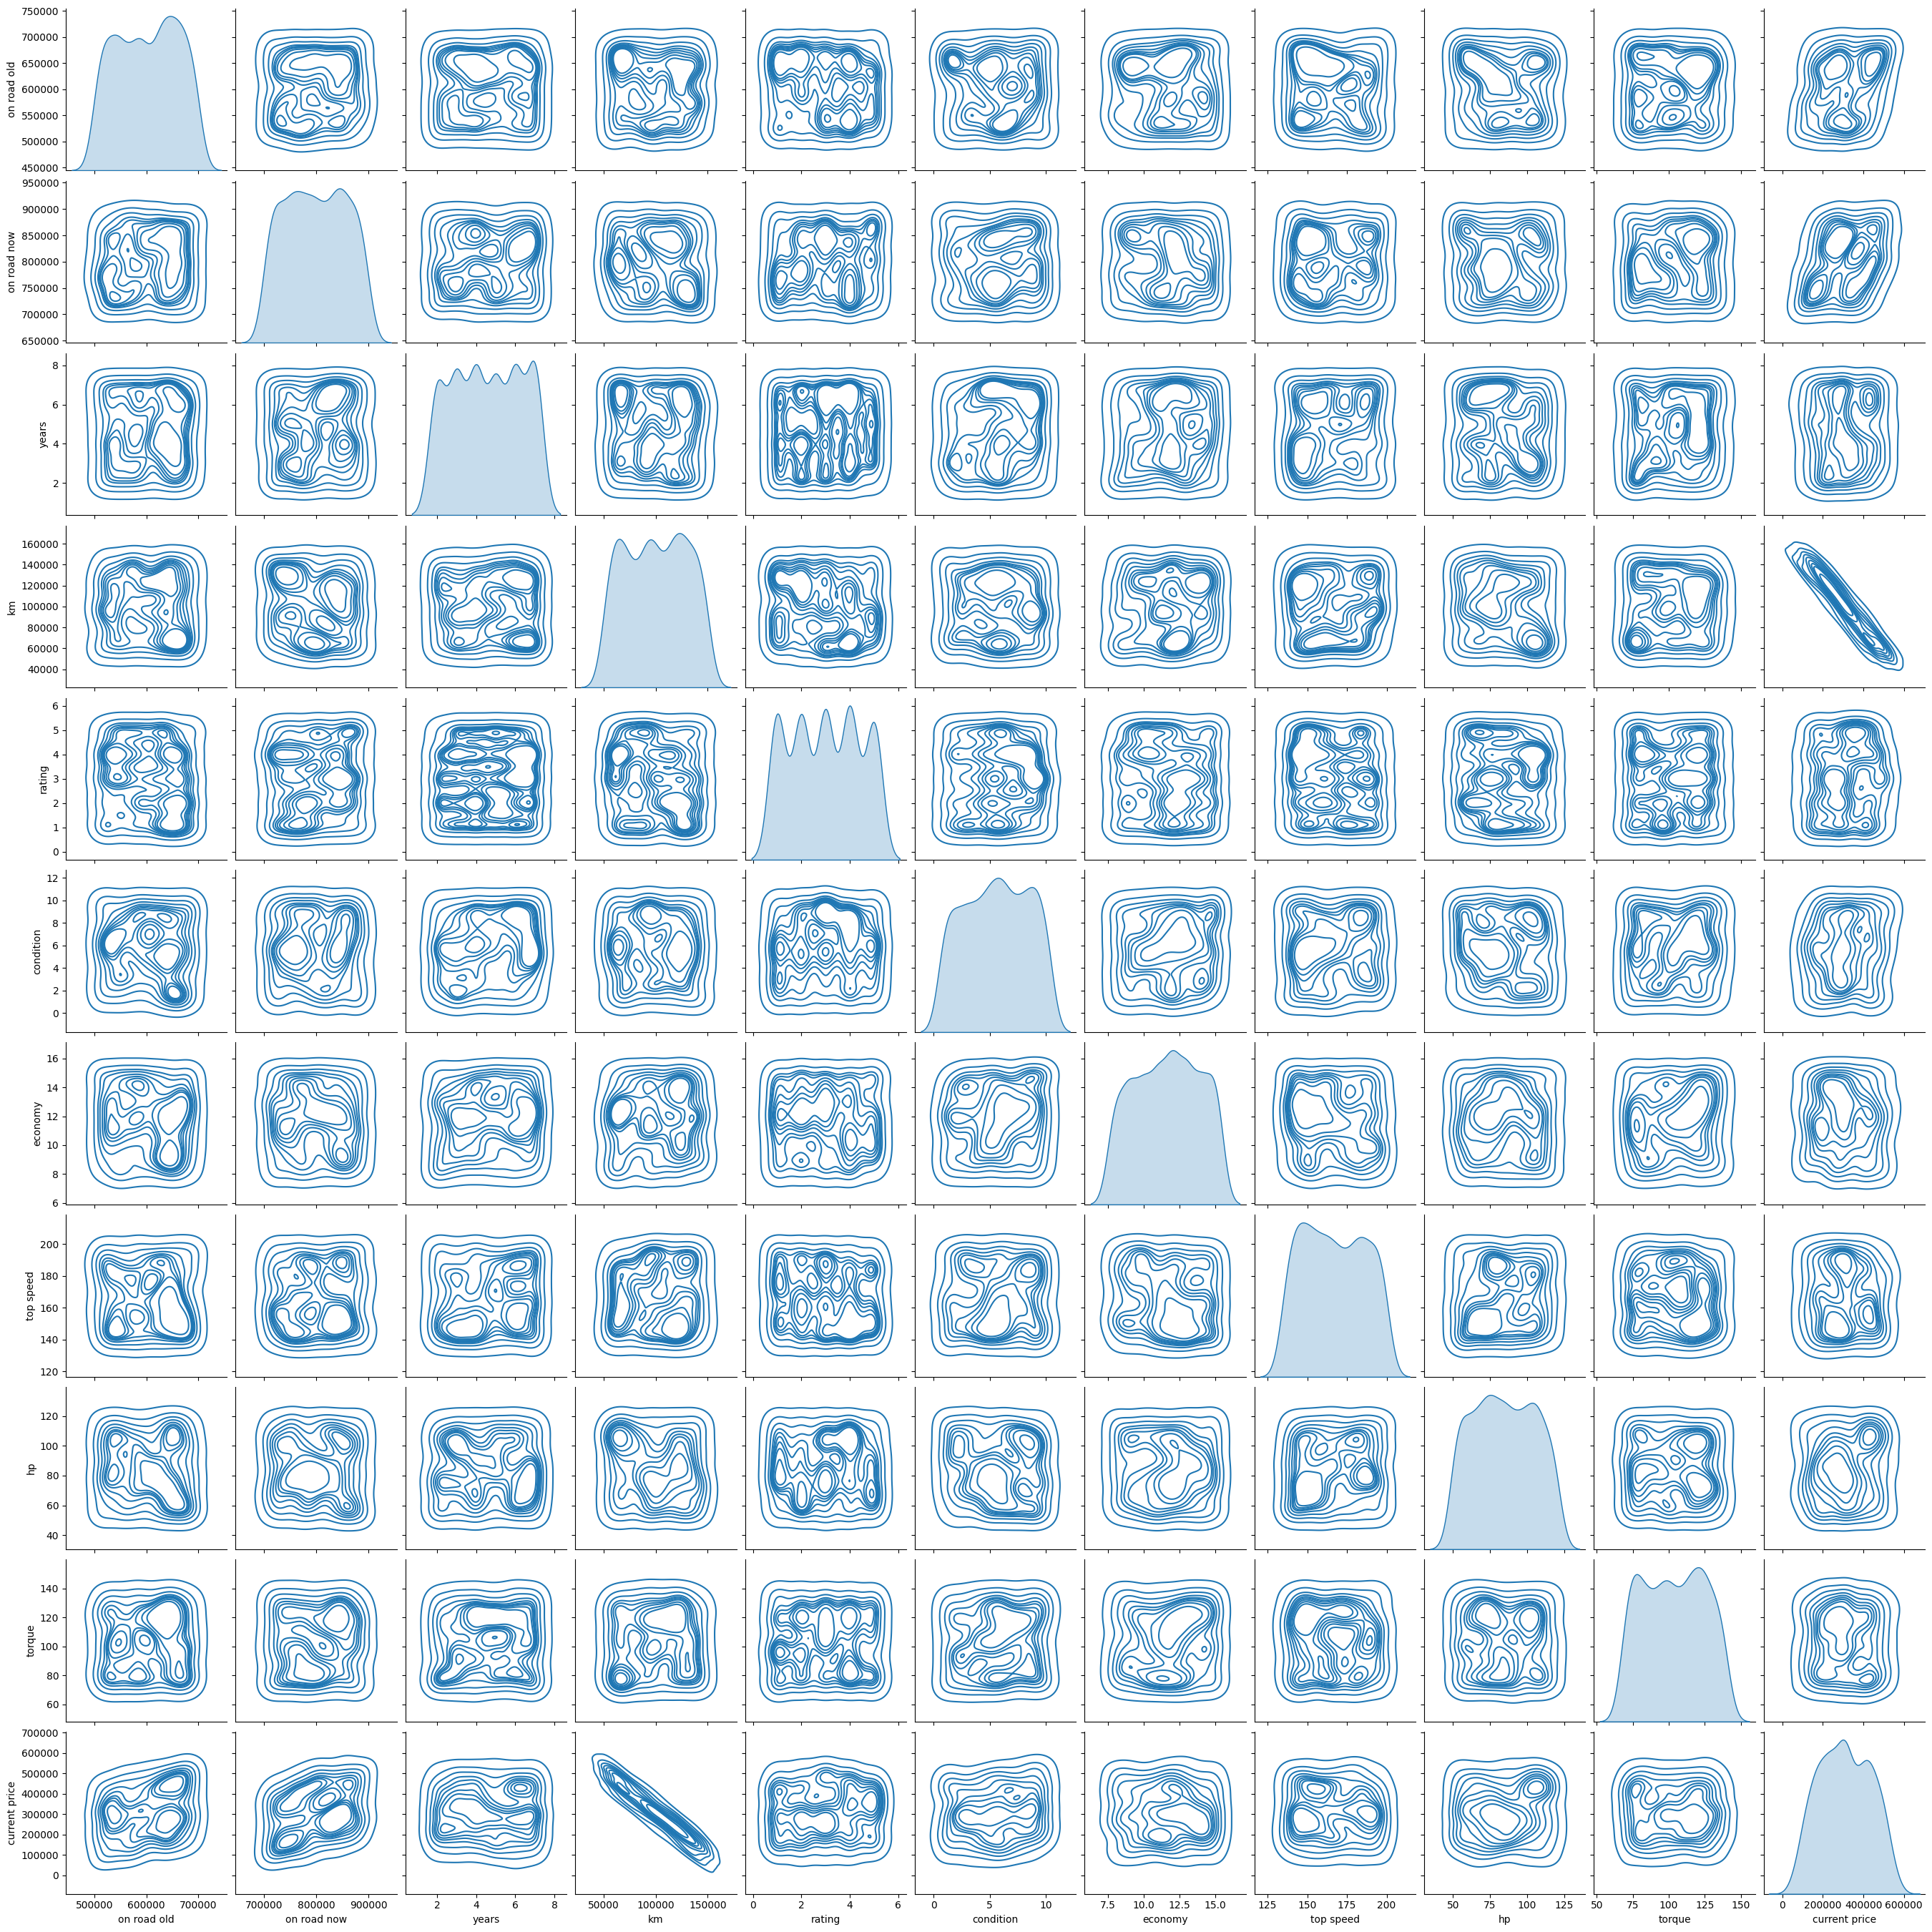

In [ ]:
sns.pairplot(data[list(data.columns)[1:]],kind = 'kde')

In [ ]:
# Convert to Tensor
tensor_data = tf.constant(data)
print(tensor_data.dtype)

# Cast to float32
tensor_data = tf.cast(tensor_data,tf.float32)
print(tensor_data.dtype)

<dtype: 'float64'>
<dtype: 'float32'>


In [ ]:
# Random Shuffle
tensor_data = tf.random.shuffle(tensor_data)


In [ ]:
# X,y 
X = tensor_data[:,3:-1]
print(X.shape)

y = tensor_data[:,-1]
y = tf.expand_dims(y,axis=-1)
print(y.shape)

(1000, 8)
(1000, 1)


In [ ]:
# Normalize Data 
normalizer = Normalization()
x_normalized = tf.constant([[1,2,3],
                            [4,5,6]])
normalizer.adapt(x_normalized)
normalizer(x_normalized)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-1., -1., -1.],
       [ 1.,  1.,  1.]], dtype=float32)>

In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE =len(X)

In [ ]:
# Train Split
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(f'X_trin : {X_train.shape} \ny_train: {y_train.shape}')

X_trin : (800, 8) 
y_train: (800, 1)


In [ ]:
# Val Split
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(f'X_val : {X_val.shape} \ny_val: {y_val.shape}')

X_val : (100, 8) 
y_val: (100, 1)


In [ ]:
# Test Split
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(f'X_test : {X_test.shape} \ny_test: {y_test.shape}')

X_test : (100, 8) 
y_test: (100, 1)


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))
train_dataset = train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val,y_val))
val_dataset = val_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Normalize X Data
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)

<tf.Tensor: shape=(1000, 8), dtype=float32, numpy=
array([[-0.9117587 , -0.6980475 , -1.4046502 , ...,  0.51316994,
        -0.5755059 ,  0.9342201 ],
       [ 0.8304557 ,  0.6154479 ,  1.3976449 , ..., -0.9875903 ,
        -0.526438  , -0.38756672],
       [-1.4924968 ,  1.1411206 , -0.7040764 , ...,  0.72017133,
        -1.5568651 , -0.29315338],
       ...,
       [ 1.4111938 , -0.43116173, -1.4046502 , ...,  1.4964267 ,
         1.3872124 , -0.67080677],
       [-1.4924968 ,  1.4136001 ,  0.69707114, ...,  0.8754224 ,
         1.3381444 ,  1.1702534 ],
       [ 0.24971758, -1.0978444 ,  0.69707114, ...,  1.6516777 ,
         0.700261  , -0.34036005]], dtype=float32)>

In [ ]:
inputs = tf.keras.Input(shape=(8))
x = normalizer(inputs)
x = Dense(32,activation='relu')(x)
x = Dense(32,activation = 'relu')(x)
x = Dense(32,activation = 'relu')(x)
outputs = Dense(1)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 8)]               0         
                                                                 
 normalization_11 (Normaliza  (None, 8)                17        
 tion)                                                           
                                                                 
 dense_6 (Dense)             (None, 32)                288       
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                           

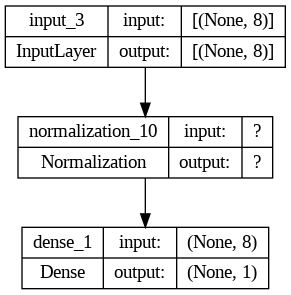

In [ ]:
tf.keras.utils.plot_model(model,to_file = 'model.png', show_shapes = True)

In [ ]:
model.compile(optimizer = Adam(),
    loss = MeanAbsoluteError())

In [ ]:
history = model.fit(X_train,y_train,validation_data = (X_val,y_val),epochs=100,verbose=0)

In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

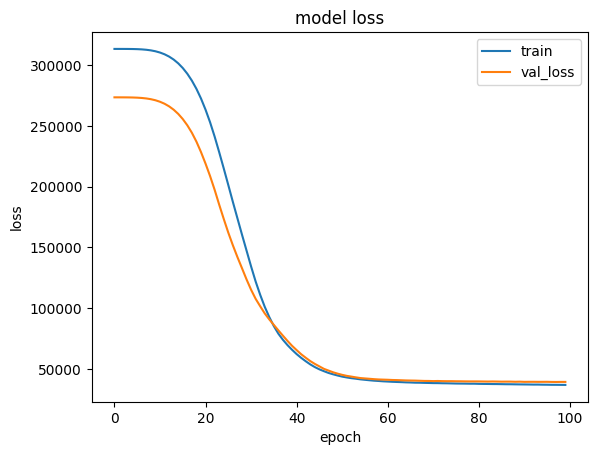

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val_loss'])
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 39498.4961


39498.49609375

In [ ]:
y_pred = model.predict(X_test)
print(y_pred.shape)

4/4 [==============================] - 0s 2ms/step
(100, 1)


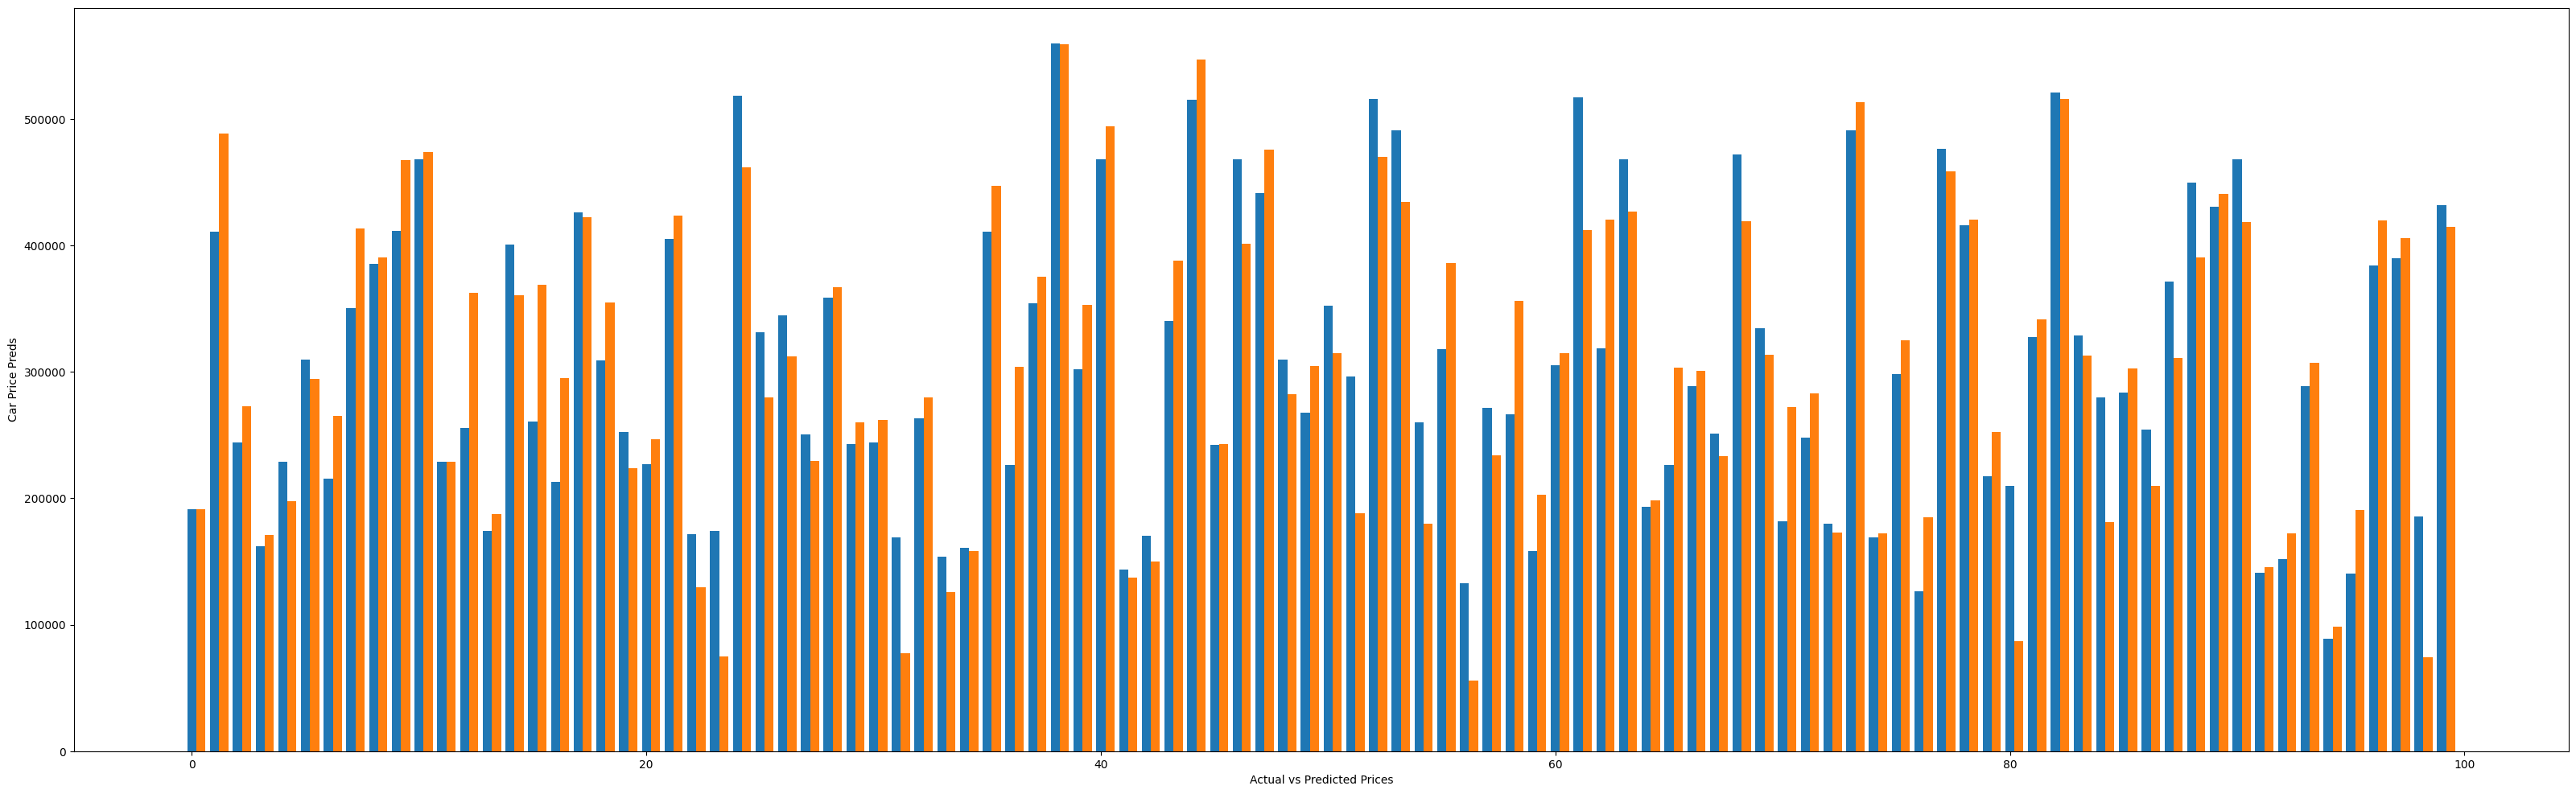

In [ ]:
ind = np.arange(100)
plt.figure(figsize=(40,12))
width = 0.4
plt.bar(ind,y_pred[:,0],width,label="Predicted Car Price")
plt.bar(ind+width,y_test[:,0],width,label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Preds')

plt.show()